# Task # 2 - To Explore Supervised Machine Learning

In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables. 

In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm


In [61]:
df= pd.read_csv('../GRIP/data.csv')

In [91]:
df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exploratory Data Analysis

In [63]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [65]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [66]:
df.describe()

,Hours,Scores
count,25.000000,25.0000
mean,5.012000,50.4000
std,2.525094,26.7753
min,1.100000,3.0000
25%,2.700000,27.0000
50%,4.800000,47.0000
75%,7.400000,75.0000
max,9.200000,95.0000


# Checking Asssumption

# i.checking outliers in the dataset

<AxesSubplot:>

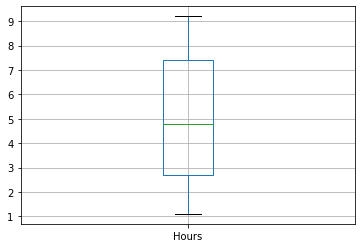

In [67]:
df.boxplot( 'Hours')

<AxesSubplot:>

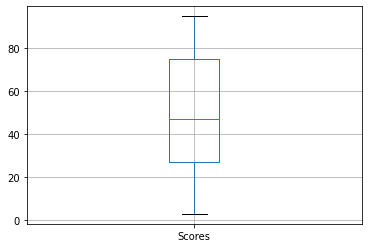

In [68]:
df.boxplot('Scores')

# ii.checking linearity

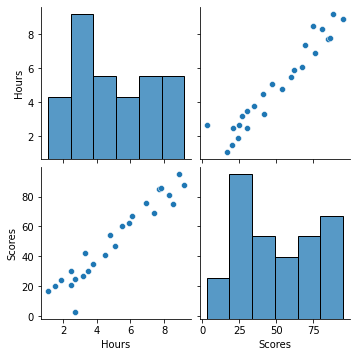

In [69]:
sns.pairplot(df)

# iii.Normality

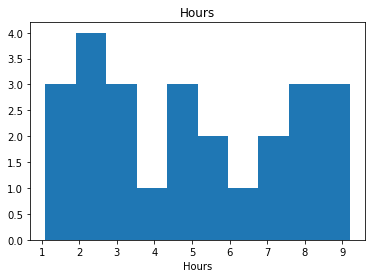

In [70]:
plt.hist(df.Hours)
plt.title('Hours')
plt.xlabel('Hours')
plt.show()

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

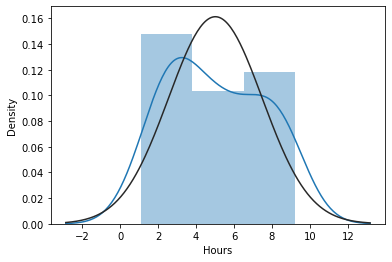

In [71]:
sns.distplot(df["Hours"], fit=norm)

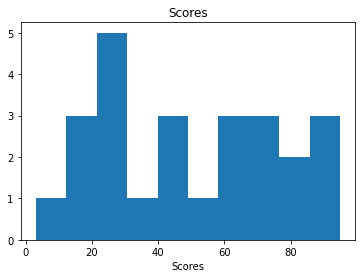

In [72]:
plt.hist(df.Scores)
plt.title('Scores')
plt.xlabel('Scores')
plt.show()

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

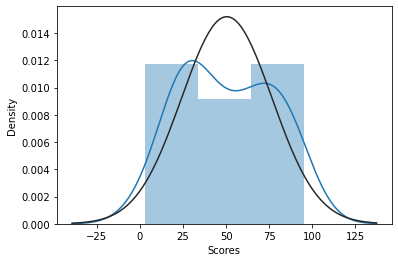

In [73]:
sns.distplot(df["Scores"], fit=norm)

# Data Visualization

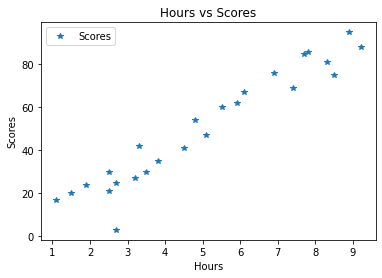

In [74]:
df.plot(x="Hours", y="Scores" , style='*')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [75]:
data= df.corr()
data

,Hours,Scores
Hours,1.000000,0.960396
Scores,0.960396,1.000000


# Preparing the data

In [76]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,1].values

# Dividing the dataset into Trainning and testing

In [77]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,
                                                    random_state=0)

# Model Building

In [78]:
from sklearn.linear_model import LinearRegression
ln=LinearRegression()
ln.fit(X_train,Y_train)

LinearRegression()

In [79]:
print(ln.intercept_)

-2.2400297811731065


In [80]:
print(ln.coef_)

[10.46565454]


# Testing the Data

In [81]:
Y_pred = ln.predict(X_test)
Y_pred

array([13.45845203, 31.25006474, 75.2058138 , 23.92410656, 59.507332  ])

In [82]:
Data1 = pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
Data1

,Actual,Predicted
0,20,13.458452
1,27,31.250065
2,69,75.205814
3,30,23.924107
4,62,59.507332


# Predicting for value 9.25


In [90]:
Hours=(9.25)
pred= ln.predict([[9.25]])
print('Number of Hours = {}'.format(Hours))
print('Predicted Score = {}'.format(pred))


Number of Hours = 9.25
Predicted Score = [94.5672747]


So, if a student studies for 9.25 hours a day then his/her predicted percentage score will be 94.5672%


# Model Evaluation

In [86]:
from sklearn import metrics
from sklearn.metrics import r2_score

r2=r2_score(Y_test,Y_pred)
print('R Square:',r2)
print('MAE', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE',metrics.mean_squared_error(Y_test, Y_pred) )
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

R Square: 0.928075459331174
MAE 5.113197591609475
MSE 28.499379994615644
RMSE: 5.338481056875227


# The accuracy of the model is 92.81%.